# Statistical analysis of monthly background checks of gun purchases 

## Used to create: http://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html

### source: https://github.com/NYTimes/gun-sales 





In [44]:
library('seasonal')
library('dplyr')
library('readr')
library('stringr')

In [18]:
# load our helper functions
source('functions.R')

In [10]:
# read source data
all <- read_csv('data/ncis_bystate_bymonth_bytype.csv', na = '#N/A')

In [11]:
all

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "\342\213\261"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "\342\213\261"): invalid factor level, NA generated

,state,year,month,month.num,population,guns_per_thousand,guns_sold,multiplier,instore_purchases,permit,ellip.h,returned_other,rental_handgun,rental_longgun,private_handgun,private_longgun,private_other,privatereturn_handgun,privatereturn_longgun,privatereturn_other,totals
1,Alabama,1998,November,11,4822023,0.2445446652,1177,1.1,1072,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,1062
2,Alaska,1998,November,11,731449,0.2150525874,157,1.1,143,4,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,145
3,Arizona,1998,November,11,6553255,0.0652957958,426,1.1,389,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,379
4,Arkansas,1998,November,11,2949131,0.2237947382,658,1.1,600,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,589
5,California,1998,November,11,38041430,0.0482027095,1834,1.1,1667,434,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,2101
6,Colorado,1998,November,11,5187582,0.1371930121,707,1.1,647,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,622
7,Connecticut,1998,November,11,3590347,0.0165443619,59,1.1,54,17,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,80
8,Delaware,1998,November,11,917092,0.0671688337,61,1.1,56,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,55
9,District of Columbia,1998,November,11,635040,0,0,1.1,0,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
10,Florida,1998,November,11,19317568,0.0445294149,858,1.1,782,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,812


In [13]:
# estimate gun sales using formula by Jurgen Brauer, published here
# http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf
#
# note: the column `multiple_corrected` is a copy of `multiple` in which
# we set the checks in the "multiple" category to 0 for California
all <- all %>% mutate(guns_sold=(handgun + longgun) * 1.1 + multiple_corrected * 2)
all

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "\342\213\261"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "\342\213\261"): invalid factor level, NA generated

,state,year,month,month.num,population,guns_per_thousand,guns_sold,multiplier,instore_purchases,permit,ellip.h,returned_other,rental_handgun,rental_longgun,private_handgun,private_longgun,private_other,privatereturn_handgun,privatereturn_longgun,privatereturn_other,totals
1,Alabama,1998,November,11,4822023,0.2445446652,1177.2,1.1,1072,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,1062
2,Alaska,1998,November,11,731449,0.2150525874,156.9,1.1,143,4,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,145
3,Arizona,1998,November,11,6553255,0.0652957958,425.9,1.1,389,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,379
4,Arkansas,1998,November,11,2949131,0.2237947382,657.8,1.1,600,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,589
5,California,1998,November,11,38041430,0.0482027095,1833.7,1.1,1667,434,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,2101
6,Colorado,1998,November,11,5187582,0.1371930121,706.7,1.1,647,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,622
7,Connecticut,1998,November,11,3590347,0.0165443619,59.4,1.1,54,17,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,80
8,Delaware,1998,November,11,917092,0.0671688337,61.4,1.1,56,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,55
9,District of Columbia,1998,November,11,635040,0,0,1.1,0,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
10,Florida,1998,November,11,19317568,0.0445294149,858.2,1.1,782,0,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,812


In [14]:
# let's look at the total numbers
total <- all %>% state_ts('Totals', 'guns_sold')

In [15]:
total

           Jan       Feb       Mar       Apr       May       Jun       Jul
2000  574951.4  649111.0  664621.9  552965.2  467712.2  479248.4  480018.8
2001  568017.7  609011.6  647259.9  523524.6  471943.0  473599.5  464279.0
2002  526898.7  560179.0  595596.7  502958.3  440877.8  409741.6  424164.6
2003  520268.8  575799.7  608336.7  492719.8  443537.3  411370.0  415426.7
2004  563812.6  602188.7  613228.8  522580.7  436434.1  430734.9  455593.0
2005  558737.1  626878.3  646106.0  560318.6  459847.7  452463.7  461922.2
2006  658550.1  700401.2  730451.8  589938.9  506300.6  500222.9  485773.1
2007  669125.4  709080.9  768020.0  637739.3  604445.3  604934.3  570116.7
2008  676153.5  755757.6  771667.5  657547.1  614266.2  558243.9  572068.7
2009  895781.7  957372.6 1015839.1  877288.4  704754.3  635908.8  620481.8
2010  734877.1  859512.7  901785.5  760903.6  646476.0  617476.8  638854.8
2011  810369.3  977452.5 1036247.1  878875.2  722935.4  697092.9  695482.4
2012  949087.2 1283993.7 

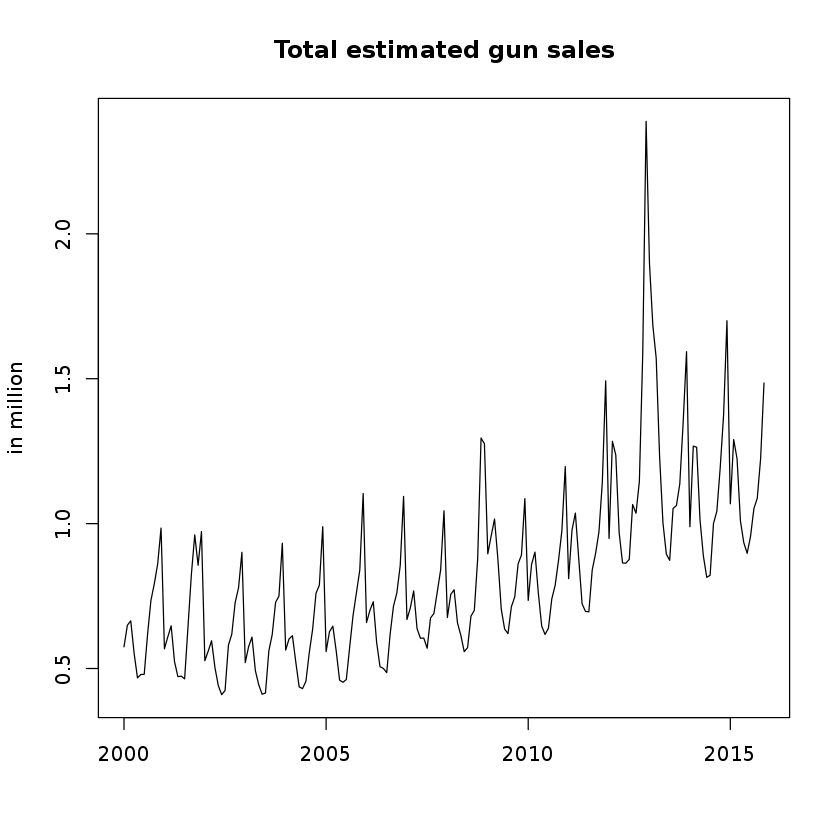

In [16]:
plot(total / 1e6, main='Total estimated gun sales', ylab='in million', xlab='')


In [21]:
# compute seasonally adjusted gun sales
total.seas <- total %>% seas %>% final


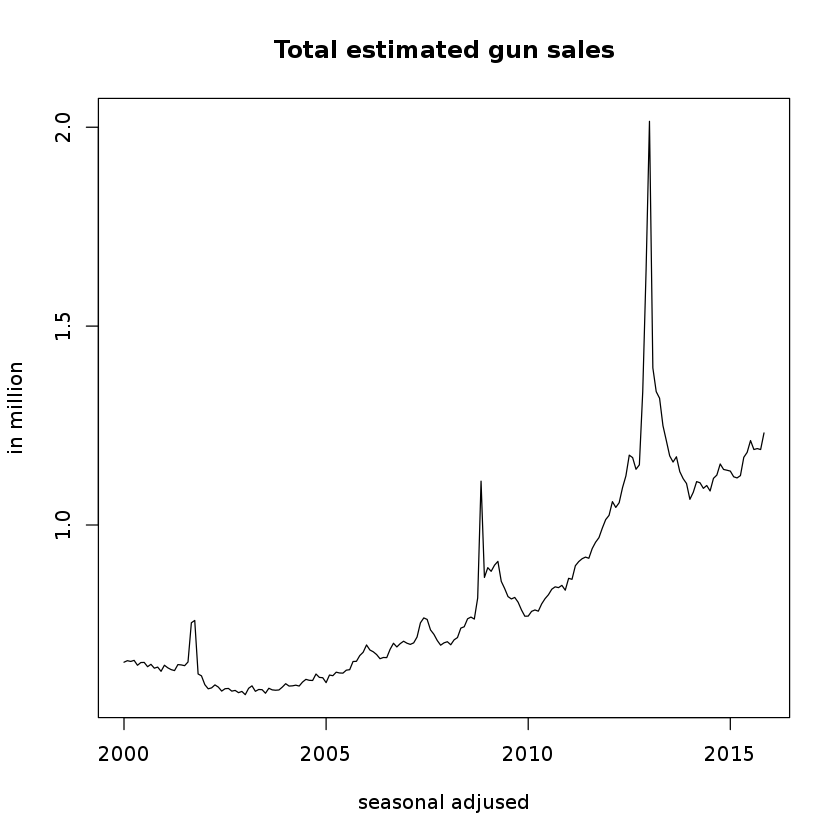

In [22]:
# plot seasonally adjusted gun sales
plot(total.seas / 1e6, main='Total estimated gun sales', ylab='in million', xlab='seasonal adjused')


In [23]:

# read population data
pop.total <- read_csv('data/population.csv') %>%
    filter(year >= 2000) %>%
    filter(year < 2015 | month <= 11) %>%
    with(ts(res_pop, start=c(2000,1), frequency = 12))



In [24]:

# normalize gun sales by population
total.seas.pop <- total.seas / pop.total * 1000


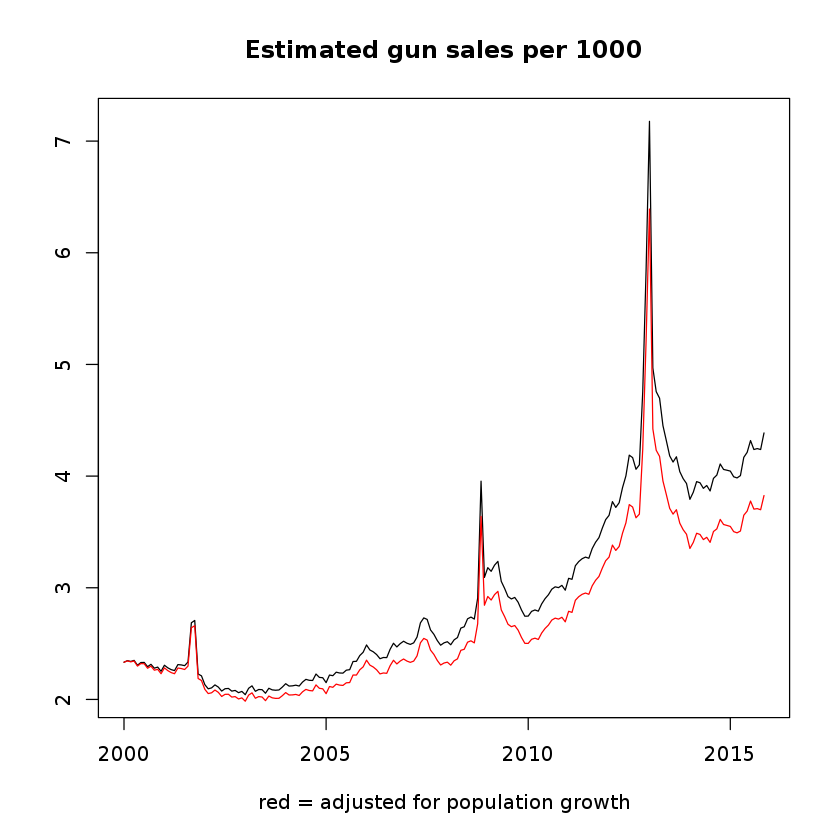

In [25]:
# plot gun sales normalized to population
plot(total.seas / 280726, main='Estimated gun sales per 1000', xlab='red = adjusted for population growth', ylab='')
# and add the not normalized version for comparison
lines(total.seas.pop, col='red')


In [26]:
# create a big data frame that contains all the
# data we need in the final piece
out_data <- ts_to_dataframe(total, 'guns_total') %>% 
    mutate(guns_total=round(guns_total, 3))


In [27]:
out_data

,year,month,guns_total
1,2000,1,574951.4
2,2000,2,649111
3,2000,3,664621.9
4,2000,4,552965.2
5,2000,5,467712.2
6,2000,6,479248.4
7,2000,7,480018.8
8,2000,8,618566.7
9,2000,9,735381.6
10,2000,10,792514.7


In [28]:
ts_to_dataframe( total.seas.pop ) %>%
    mutate(guns_total_per_1000=round(value,3)) %>%
    select(year, month, guns_total_per_1000)


,year,month,guns_total_per_1000
1,2000,1,2.334
2,2000,2,2.345
3,2000,3,2.337
4,2000,4,2.344
5,2000,5,2.299
6,2000,6,2.321
7,2000,7,2.32
8,2000,8,2.28
9,2000,9,2.299
10,2000,10,2.262


In [29]:

# create a temporary data frame for computing the
# handgun_share and longgun_share columns

tmp.handguns <- all %>% state_ts('Totals', 'handgun') %>%
    seas %>% final %>% ts_to_dataframe('handgun')
tmp.longguns <- all %>% state_ts('Totals', 'longgun') %>%
    seas %>% final %>% ts_to_dataframe('longgun')
tmp.other <- all %>% state_ts('Totals', 'other') %>%
    seas %>% final %>% ts_to_dataframe('other')
tmp.multiple <- all %>% state_ts('Totals', 'multiple_corrected') %>%
    seas %>% final %>% ts_to_dataframe('multiple')



In [30]:
# merge above dataframes into one
temp <- tmp.handguns %>%
    left_join(tmp.longguns, c('year', 'month')) %>%
    left_join(tmp.other, c('year', 'month')) %>%
    left_join(tmp.multiple, c('year', 'month'))


In [31]:

# convert NAs to 0 in column other
temp$other[is.na(temp$other)] <- 0


In [32]:
# compute the handgun/longgun share
temp <- temp %>%
    mutate(handgun_share=round(handgun / (handgun + longgun + other + multiple * 0.5), 4)) %>%
    mutate(longgun_share=round(longgun / (handgun + longgun + other + multiple * 0.5), 4)) %>% 
    select(year, month, handgun_share, longgun_share)


In [33]:

# join into master data frame
out_data <- out_data %>%
    left_join(temp, c('year', 'month')) %>%
    filter(year >= 2000)


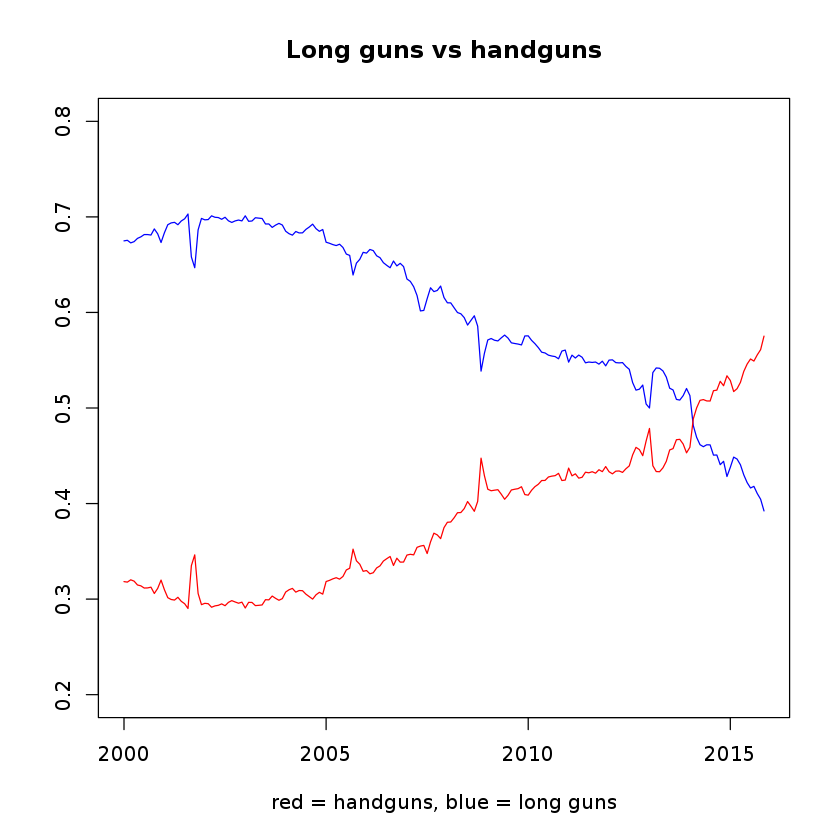

In [36]:
# plot handgun/longgun 
temp$time <- temp$year + (temp$month-1) / 12

temp %>% with(plot(time, longgun_share, type='l', col='blue',
                   ylim=c(0.2,0.8), main='Long guns vs handguns',
                   ylab='', xlab='red = handguns, blue = long guns'))
temp %>% with(lines(time, handgun_share, col='red'))


In [50]:
# plot percent of national for selected states 
show_states <- c('New Jersey', 'Maryland', 'Georgia',
                 'Louisiana', 'Mississippi', 'Missouri')


for (s in show_states) {
    s.ts <- state_data(s)
    
    # merge with out_data
    temp <- ts_to_dataframe(s.ts) %>% mutate(value=round(value,3))
    colnames(temp) <- c('year', 'month', str_replace_all(str_to_lower(s), ' ', '_'))
    out_data <- out_data %>% left_join(temp, c('year', 'month'))
}


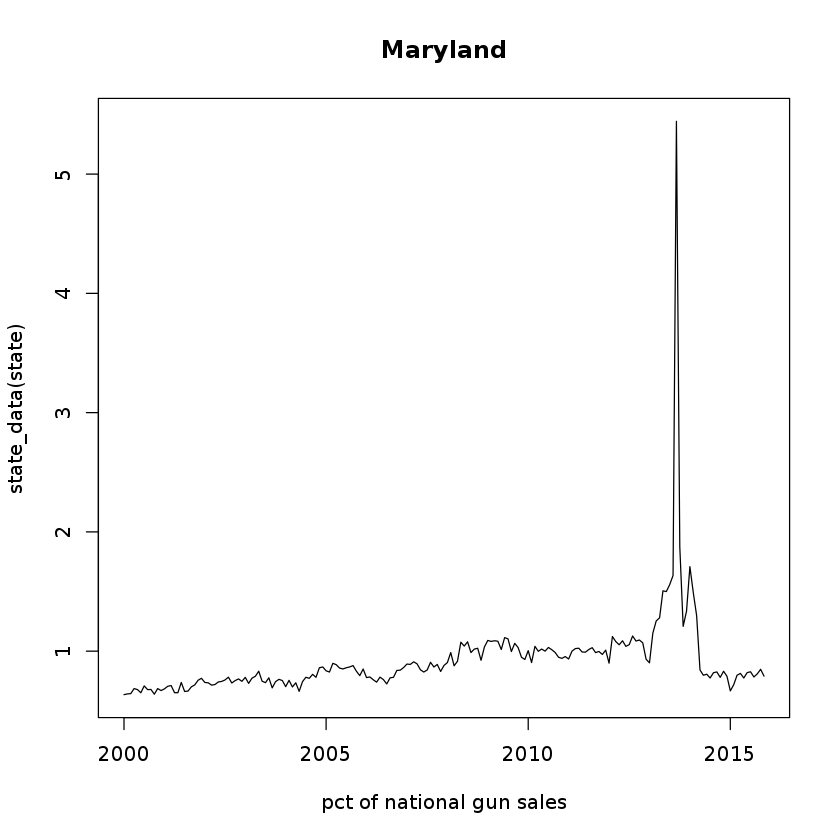

In [53]:
# plot state data
state = 'Maryland' # change this to see the other states
plot(state_data(state), main=paste(state), xlab='pct of national gun sales')


In [41]:
head(out_data)


,year,month,guns_total,handgun_share,longgun_share,new_jersey.x,maryland.x,georgia.x,louisiana.x,mississippi.x,missouri.x,new_jersey.y,maryland.y,georgia.y,louisiana.y,mississippi.y,missouri.y,new_jersey
1,2000,1,574951.4,0.3183,0.6749,0.469,0.635,3.075,2.505,2.391,2.71,0.469,0.635,3.075,2.505,2.391,2.71,0.469
2,2000,2,649111,0.3178,0.6755,0.475,0.642,3.044,2.493,2.394,2.728,0.475,0.642,3.044,2.493,2.394,2.728,0.475
3,2000,3,664621.9,0.3202,0.6728,0.493,0.644,3.067,2.447,2.339,2.668,0.493,0.644,3.067,2.447,2.339,2.668,0.493
4,2000,4,552965.2,0.3188,0.6741,0.516,0.687,3.171,2.601,2.422,2.743,0.516,0.687,3.171,2.601,2.422,2.743,0.516
5,2000,5,467712.2,0.3148,0.6775,0.525,0.678,3.092,2.538,2.453,2.739,0.525,0.678,3.092,2.538,2.453,2.739,0.525
6,2000,6,479248.4,0.3139,0.6791,0.551,0.651,3.072,2.481,2.473,2.823,0.551,0.651,3.072,2.481,2.473,2.823,0.551


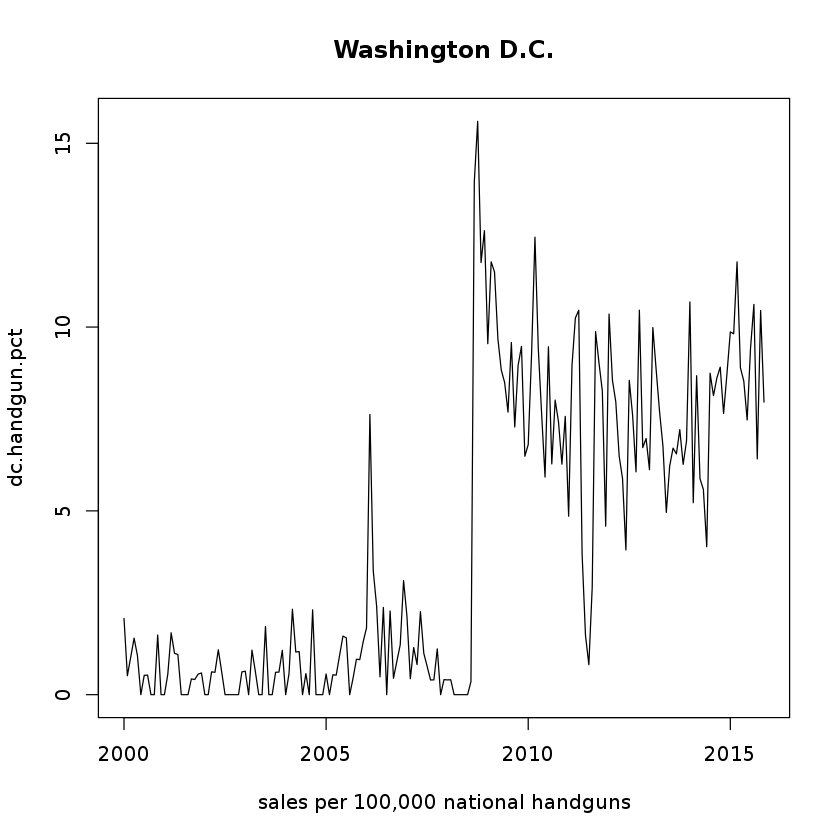

In [42]:
# compute handgun sales for DC: handung * 1.1 + multiple

dc.handgun_checks <- state_ts(all, 'District of Columbia', 'handgun', outer_zeros_to_na=F)
dc.multiple <- state_ts(all, 'District of Columbia', 'multiple', outer_zeros_to_na=F)
dc.handgun <- (dc.handgun_checks * 1.1 + dc.multiple + 1) %>% seas %>% final - 1
total.handgun <- (state_ts(all, 'Totals', 'handgun') * 1.1 + state_ts(all, 'Totals', 'multiple')) %>% seas %>% final
dc.handgun.pct <- dc.handgun / total.handgun * 100000

# plot DC chart
plot(dc.handgun.pct, main='Washington D.C.', xlab='sales per 100,000 national handguns')


In [43]:

# merge with out_data
temp <- ts_to_dataframe(round(dc.handgun.pct, 1), 'dc_handguns_per_100k_national_sales')
out_data <- out_data %>% left_join(temp, c('year', 'month'))


In [47]:
# check yearly sums for overall trends
ts_to_dataframe(total) %>%
    group_by(year) %>%
    summarize(guns_sold=sum(value))


,year,guns_sold
1,2000,7860597
2,2001,8015911
3,2002,7066003
4,2003,7056021
5,2004,7351008
6,2005,7728322
7,2006,8214242
8,2007,8575761
9,2008,9437241
10,2009,10006440


In [48]:

# estimate how much more guns are sold missouri after law change
missouri <- state_data('Missouri', normalize = F, adj_seasonal = F)
missouri.avg_pre_2007 <- mean(missouri[73:84])
missouri.avg_post_2008 <- mean(missouri[97:108])
print(paste('Increase in monthly gun sales in Missouri =', missouri.avg_post_2008 - missouri.avg_pre_2007))


[1] "Increase in monthly gun sales in Missouri = 8773.09166666667"
